취급액 = 판매단가 X 주문량 

In [1]:
import pandas as pd
from pandas import Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime

In [2]:
from matplotlib import font_manager, rc 

font_name=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name) 

In [3]:
df=pd.read_excel('제공데이터.xlsx', encoding='utf-8')
df.head(5)

,Unnamed: 0,Unnamed: 0.1,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,주문량,월,시간대,시청률,날짜,강수량(mm),공휴일
0,0,0,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,2099000,2,52.606516,1,6,0.0,1,0.0,1
1,1,1,2019-01-01 06:00:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,4371000,2,109.548872,1,6,0.0,1,0.0,1
2,2,2,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,3262000,2,81.754386,1,6,0.0,1,0.0,1
3,3,3,2019-01-01 06:20:00,20,100346,201079,테이트 여성 셀린니트3종,1,39900,6955000,2,174.310777,1,6,0.0,1,0.0,1
4,4,4,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,1,39900,6672000,2,167.218045,1,6,0.0,1,0.0,1


In [4]:
del df['Unnamed: 0']
del df['Unnamed: 0.1']

In [4]:
df.groupby(['상품군']).agg({'판매단가' : ('mean','median','min','max','count')})

판매단가                                
              mean   median     min      max count
상품군                                               
가구    8.434763e+05   648000   89000  3990000  2614
가전    1.631382e+06  1499000  164000  3190000  6479
건강기능  8.332430e+04    75050   39900   238000   790
농수축   4.641954e+04    43900   28900   109900  3884
생활용품  1.864539e+05   148000   12800  1980000  2877
속옷    7.798127e+04    79000   29900   139000  3919
의류    1.554892e+05    69000   29000  2490000  4340
이미용   5.103004e+04    39900   39800    79900  1305
잡화    4.694785e+05   129000   29000  7930000  3891
주방    1.524328e+05   158000   24900  1184400  6604
침구    7.856951e+04    69900   39900   239000   669

# 시각화

In [5]:
df['상품군'].value_counts()

주방      6604
가전      6479
의류      4340
속옷      3919
잡화      3891
농수축     3884
생활용품    2877
가구      2614
이미용     1305
건강기능     790
침구       669
Name: 상품군, dtype: int64

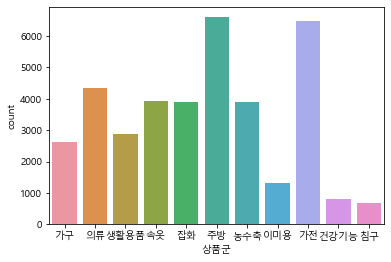

In [6]:
#상품군 빈도대로 그래프
ax = plt.subplots()
ax = sns.countplot('상품군', data=df)

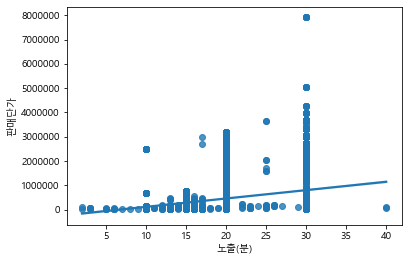

In [7]:
#노출된 시간이 많을수록 단가가 높은 상품
sns.regplot(x='노출(분)', y='판매단가', data=df)

In [8]:
#상품군별로 가장 잘 팔리는 월과 월의 요일을 상품군
df.groupby(['상품군', '월'])['요일'].count().unstack()

월,1,2,3,4,5,6,7,8,9,10,11,12
상품군,,,,,,,,,,,,
가구,NaN,207.0,307.0,323.0,279.0,279.0,207.0,207.0,261.0,219.0,151.0,174.0
가전,570.0,624.0,602.0,838.0,1076.0,530.0,606.0,480.0,348.0,252.0,315.0,238.0
건강기능,63.0,39.0,60.0,37.0,54.0,87.0,69.0,48.0,77.0,99.0,79.0,78.0
농수축,458.0,281.0,208.0,173.0,243.0,197.0,342.0,503.0,440.0,379.0,333.0,327.0
생활용품,83.0,126.0,244.0,173.0,117.0,90.0,146.0,285.0,216.0,476.0,365.0,556.0
속옷,389.0,370.0,414.0,348.0,347.0,374.0,367.0,314.0,203.0,254.0,257.0,282.0
의류,372.0,266.0,535.0,450.0,453.0,454.0,281.0,269.0,345.0,292.0,293.0,330.0
이미용,93.0,90.0,55.0,77.0,67.0,57.0,95.0,81.0,153.0,154.0,170.0,213.0
잡화,107.0,161.0,238.0,223.0,370.0,295.0,487.0,468.0,540.0,454.0,253.0,295.0


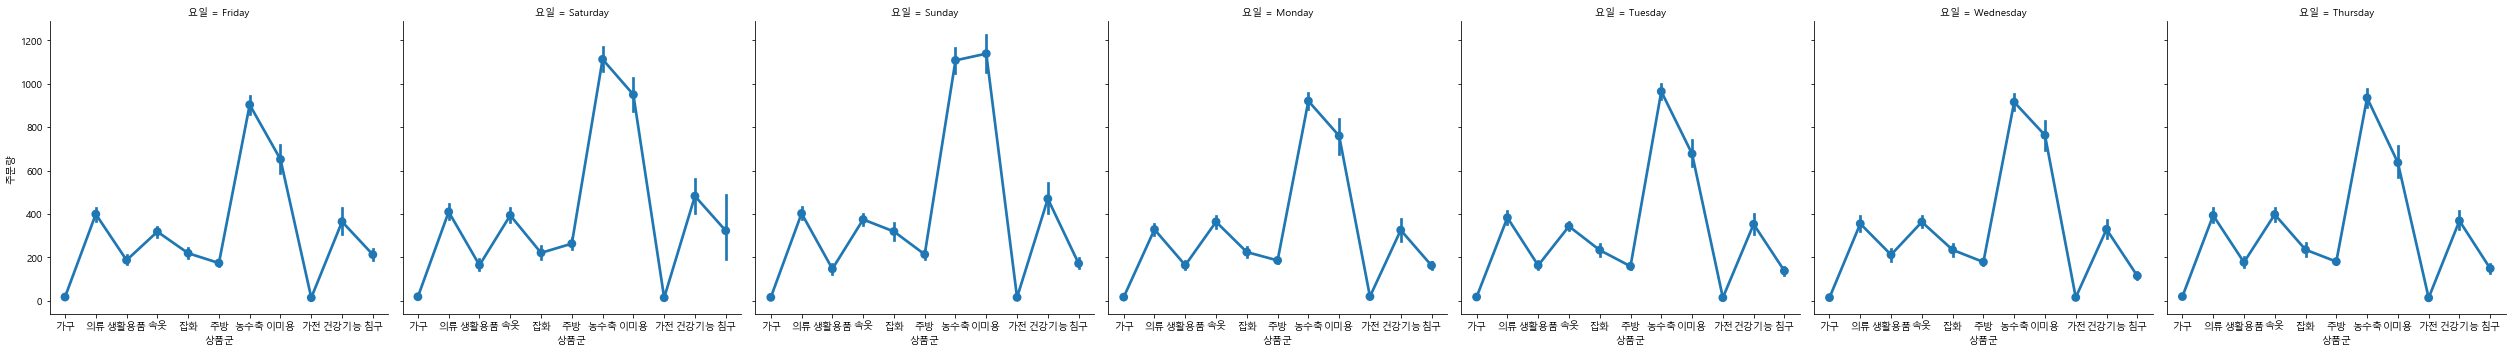

In [9]:
#요일별로 나눠서 상품군별 주문량. 잘보면 금요일과 토요일에 판매하지 않는 게 있당
sns.catplot(x='상품군', y='주문량', col='요일', data=df, kind='point')

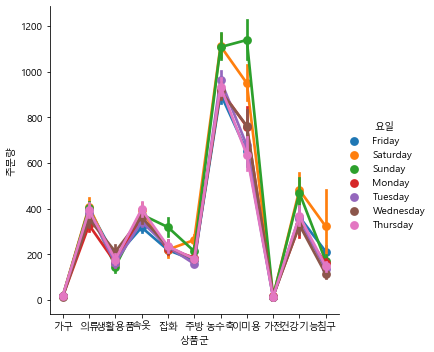

In [10]:
sns.catplot(x='상품군', y='주문량', hue='요일', data=df, kind='point')

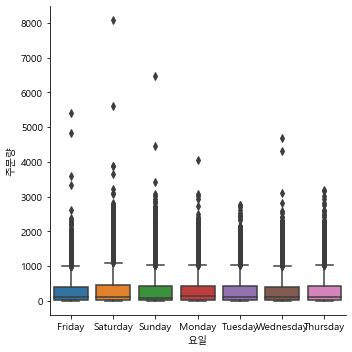

In [11]:
#금요일에 소비가 적다 목요일이 소비가 많아보인다
sns.catplot(x='요일', y='주문량', data=df, kind='box')

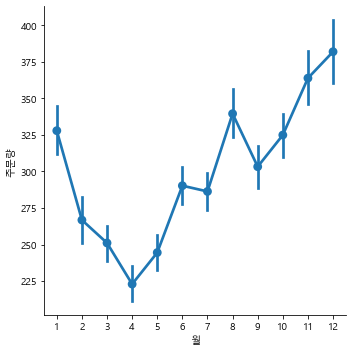

In [12]:
#월별 주문량
sns.catplot(x='월', y='주문량', data=df, kind='point')

In [13]:
#남녀 구분되는 상품
df_m = df[df['상품명'].str.contains('남성')]
df_m['성별'] = '남'
df_f = df[df['상품명'].str.contains('여성')]
df_f['성별'] = '여'
df_m.head(5)

df_fm = pd.concat([df_m, df_f])
df_fm.head(5)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,주문량,월,시간대,시청률,날짜,강수량(mm),공휴일,계절,성별
9,5699,2019-03-01 01:00:00,20,100250,200843,K-SWISS 남성약기모팬츠3종,의류,49900,8996000,Friday,180.280561,3,01:00:00,0.00000,2019-03-01,0.0,1,봄,남
10,5700,2019-03-01 01:20:00,20,100250,200843,K-SWISS 남성약기모팬츠3종,의류,49900,12291000,Friday,246.312625,3,01:20:00,0.00000,2019-03-01,0.0,1,봄,남
11,5701,2019-03-01 01:40:00,16,100250,200843,K-SWISS 남성약기모팬츠3종,의류,49900,12075000,Friday,241.983968,3,01:40:00,0.00000,2019-03-01,0.0,1,봄,남
45,5735,2019-03-01 14:00:00,20,100074,200197,비버리힐스폴로클럽 남성기초세트(2018FW골드),이미용,39800,20845000,Friday,523.743719,3,14:00:00,0.00075,2019-03-01,0.0,1,봄,남
46,5736,2019-03-01 14:20:00,20,100074,200197,비버리힐스폴로클럽 남성기초세트(2018FW골드),이미용,39800,34461000,Friday,865.854271,3,14:20:00,0.00045,2019-03-01,0.0,1,봄,남


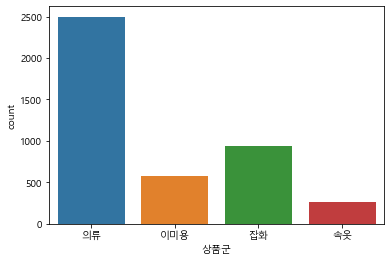

In [14]:
#남녀를 구분해서 판매하는 품목?
ax = plt.subplots()
ax = sns.countplot('상품군', data=df_fm)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


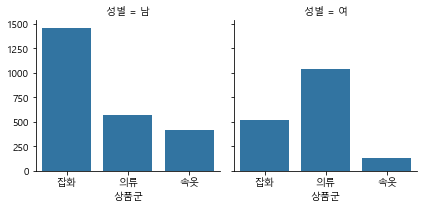

In [15]:
facet = sns.FacetGrid(df_fm, col='성별')
facet.map(sns.countplot, '상품군')

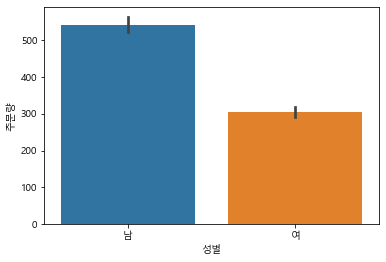

In [16]:
#더 주문량이 많은 성별
sns.barplot(x='성별', y='주문량',  data=df_fm)

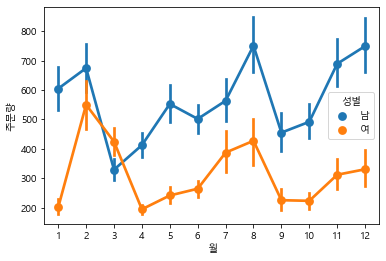

In [17]:
#월별로 님녀의 상품에 대한 주문량
sns.pointplot(x='월', y='주문량', data=df_fm, hue='성별')

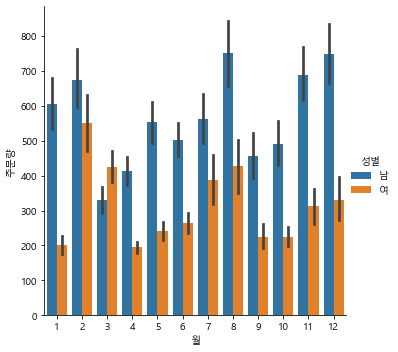

In [18]:
sns.catplot(x='월', y='주문량', data=df_fm, kind='bar', hue='성별')

In [19]:
#무이자할부 일시불
df_if = df[df['상품명'].str.contains('무이자')]
df_if['할부'] = '무'
df_ls = df[df['상품명'].str.contains('일시불')]
df_ls['할부'] = '일'

df_ifls = pd.concat([df_if, df_ls])
df_ifls.head(5)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,주문량,월,시간대,시청률,날짜,강수량(mm),공휴일,계절,할부
28,5718,2019-03-01 11:00:00,20,100448,202092,무이자 쿠첸 풀스텐 압력밥솥 10인용(A1),주방,168000,7340000,Friday,43.690476,3,11:00:00,0.000,2019-03-01,0.0,1,봄,무
30,5720,2019-03-01 11:00:00,20,100448,202094,무이자 쿠첸 풀스텐 압력밥솥 6인용(A1),주방,158000,2311000,Friday,14.626582,3,11:00:00,0.000,2019-03-01,0.0,1,봄,무
32,5722,2019-03-01 11:20:00,20,100448,202092,무이자 쿠첸 풀스텐 압력밥솥 10인용(A1),주방,168000,14563000,Friday,86.684524,3,11:20:00,0.000,2019-03-01,0.0,1,봄,무
34,5724,2019-03-01 11:20:00,20,100448,202094,무이자 쿠첸 풀스텐 압력밥솥 6인용(A1),주방,158000,3441000,Friday,21.778481,3,11:20:00,0.000,2019-03-01,0.0,1,봄,무
36,5726,2019-03-01 11:40:00,20,100448,202092,무이자 쿠첸 풀스텐 압력밥솥 10인용(A1),주방,168000,12122000,Friday,72.154762,3,11:40:00,0.001,2019-03-01,0.0,1,봄,무


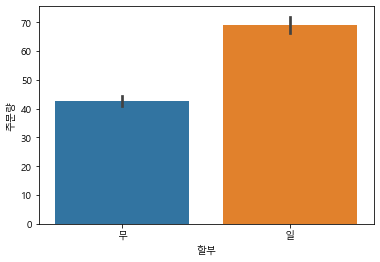

In [20]:
#할부여부?
sns.barplot(x='할부', y='주문량', data=df_ifls)

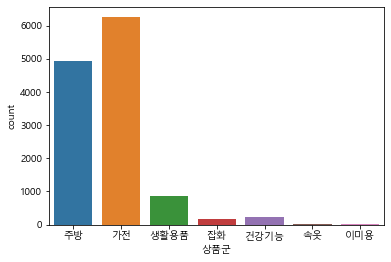

In [21]:
#할부 선택이 포함된 상품군
ax = plt.subplots()
ax = sns.countplot('상품군', data=df_ifls)

In [22]:
#grid=sns.pairplot(df)
#grid.map_upper(sns.regplot)

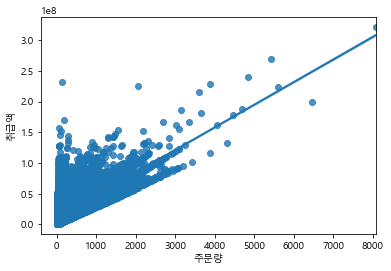

In [23]:
sns.regplot(x='주문량', y='취급액', data=df)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


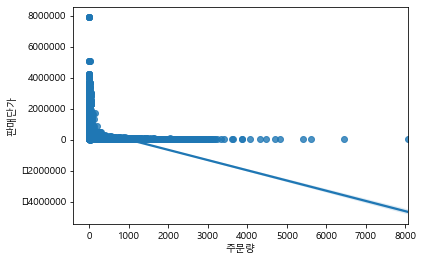

In [24]:
sns.regplot(x='주문량', y='판매단가', data=df)

In [25]:
df.groupby(['월']).agg({'시청률' : ('mean','median','min','max','count')})

시청률                               
        mean    median  min       max count
월                                          
1   0.002692  0.000550  0.0  0.050550  2881
2   0.003065  0.000700  0.0  0.092600  2813
3   0.003009  0.000800  0.0  0.064450  3248
4   0.002313  0.000550  0.0  0.080000  3413
5   0.003076  0.000900  0.0  0.120867  3559
6   0.003234  0.001300  0.0  0.101650  3011
7   0.005845  0.001950  0.0  0.099550  3345
8   0.006462  0.002700  0.0  0.102950  3137
9   0.006304  0.002400  0.0  0.125600  3127
10  0.005908  0.002200  0.0  0.082150  3075
11  0.006241  0.002150  0.0  0.096550  2779
12  0.006589  0.002575  0.0  0.067500  2984

In [26]:
df['상품명'].value_counts(normalize=False,sort=True, ascending=False)

한일 대용량 스텐 분쇄믹서기                           401
안동간고등어 20팩                                318
일시불 LG전자 매직스페이스 냉장고                       308
무이자 LG전자 매직스페이스 냉장고                       308
일시불 LG 울트라HD TV 65UK6800HNC               295
                                         ... 
(일)한샘 하이바스 내추럴 하부장형                         2
(일)보루네오 델라 원목 베드룸 세트1(프레임+매트리스+화장대+협탁)      2
알비에로 마르티니 1A클라쎄 지오 스톨라 머플러 숄                2
국내산 자숙찰골뱅이 7팩                               2
메이듀 남성 린넨 블렌디드 슬립온                          2
Name: 상품명, Length: 1692, dtype: int64

In [27]:
df['상품명'].value_counts().mean()

22.087470449172578

In [28]:
df['상품명'].value_counts().head(10)

한일 대용량 스텐 분쇄믹서기                401
안동간고등어 20팩                     318
일시불 LG전자 매직스페이스 냉장고            308
무이자 LG전자 매직스페이스 냉장고            308
일시불 LG 울트라HD TV 65UK6800HNC    295
무이자 LG 울트라HD TV 65UK6800HNC    295
일시불 LG 울트라HD TV 55UK6800HNC    277
무이자 LG 울트라HD TV 55UK6800HNC    277
일시불 LG 통돌이 세탁기                 275
무이자 LG 통돌이 세탁기                 275
Name: 상품명, dtype: int64

In [29]:
#자주 판매한 상품 5가지
df_11=df.loc[df['상품명']=='한일 대용량 스텐 분쇄믹서기']
df_22=df.loc[df['상품명']=='안동간고등어 20팩']
df_33=df[df['상품명'].str.contains('LG전자 매직스페이스 냉장고')]
df_44=df[df['상품명'].str.contains('LG 울트라HD TV 65UK6800HNC')]
df_55=df[df['상품명'].str.contains('LG 통돌이 세탁기')]
df_top=pd.concat([df_11, df_22, df_33, df_44, df_55])

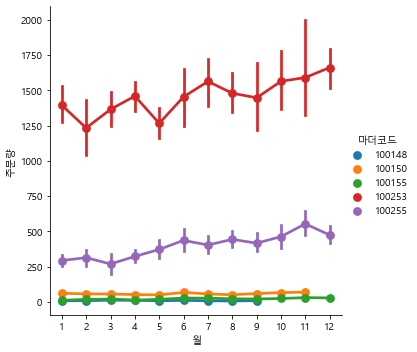

In [30]:
#100253 = 안동간고등어 20팩 / 100255 = 한일 대용량 스텐 분쇄믹서기	 
#100150 =  LG 통돌이 세탁기 / 100155 =  LG전자 매직스페이스 냉장고 / 100148 = LG 울트라HD TV 
sns.catplot(x='월', y='주문량', data=df_top, kind='point', hue='마더코드')

In [ ]:
df[]

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


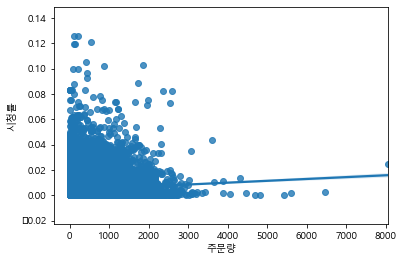

In [5]:
sns.regplot(x='주문량', y='시청률', data=df)

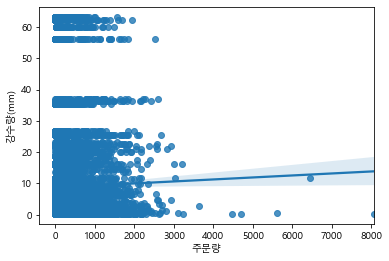

In [32]:
df_mmm=df[df['강수량(mm)']>0]
sns.regplot(x='주문량', y='강수량(mm)', data=df_mmm)

In [33]:
df.groupby('공휴일').agg({'주문량' : ('mean','median','min','max','count'), '시청률':('mean','median','min','max','count')})

주문량                                            시청률                \
           mean      median  min          max  count      mean   median  min   
공휴일                                                                            
0    299.934702  113.719101  0.0  8070.401003  35445  0.004546  0.00135  0.0   
1    262.598962   57.767857  0.0  4318.284790   1927  0.004315  0.00160  0.0   

                     
         max  count  
공휴일                  
0    0.12560  35445  
1    0.05685   1927

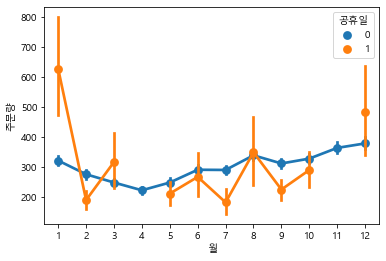

In [34]:
sns.pointplot(x='월', y='주문량', data=df, hue='공휴일')

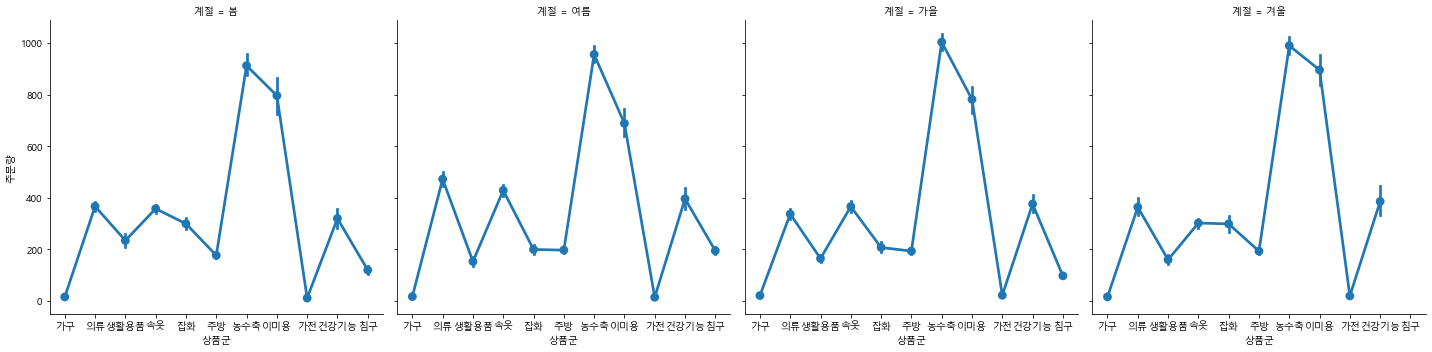

In [35]:
sns.catplot(x='상품군', y='주문량', col='계절', data=df, kind='point')

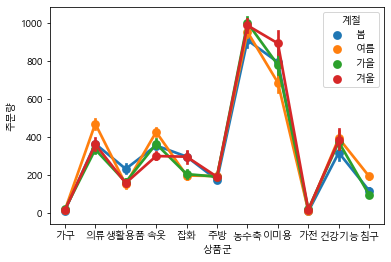

In [36]:
sns.pointplot(x='상품군', y='주문량', data=df, hue='계절')